In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [ ]:
data = pd.read_csv("train_vec.csv",index_col='Id')
data.head()

,BytFSize,00,01,02,03,04,05,06,07,08,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,Class
Id,,,,,,,,,,,,,,,,,,,,,
G0xmghzaP9n2HUCNlKFZ,519680,23263,1684,590,685,676,465,366,489,569,...,286,457,258,297,274,403,259,382,3921,1
J60pcjxyK7G2SoCsPVZz,400896,17043,643,423,612,444,339,299,453,315,...,298,349,252,242,290,336,253,323,3050,1
4y09ZDr5jWIsNSfkFHzO,475136,18741,720,466,663,517,352,317,394,496,...,272,324,298,250,286,428,253,343,4092,1
esXbGRDMpEzTQV5gIiaU,534528,18058,829,552,633,1023,388,375,400,696,...,342,361,334,315,328,376,331,377,2231,1
g6WEbHmcKApIY3rsZqzo,475136,20869,1422,670,800,765,406,382,522,644,...,383,431,364,289,295,501,275,406,3832,1


In [ ]:
x=data.drop(["02",'03'],axis=1)
y=data['BytFSize']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.10,random_state =10)

In [ ]:
data['BytFSize'].replace({
    '20141230T000000':201412301000000,
},inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, G0xmghzaP9n2HUCNlKFZ to 3pNQ4kCvMSceHP7YzqKa
Columns: 258 entries, BytFSize to Class
dtypes: int64(258)
memory usage: 3.3+ MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_train
x_test=scaler.transform(x_test)
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

x_train

,BytFSize,00,01,04,05,06,07,08,09,0a,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,Class
0,0.036209,0.013458,0.003539,0.000711,0.000316,0.000751,0.001783,0.001434,0.003143,0.003332,...,0.003091,0.017894,0.003525,0.003234,0.002059,0.005441,0.003780,0.002475,0.002144,0.625
1,0.023429,0.027583,0.006040,0.000817,0.000284,0.000577,0.001190,0.003011,0.002470,0.002806,...,0.002347,0.015822,0.002384,0.002242,0.001769,0.007661,0.003178,0.002080,0.010102,1.000
2,0.047923,0.066358,0.008149,0.000326,0.000231,0.000562,0.001162,0.000759,0.002886,0.000992,...,0.003105,0.021247,0.007286,0.002513,0.003263,0.004923,0.002179,0.001503,0.005591,0.375
3,0.299520,0.093509,0.092319,0.005739,0.001424,0.003935,0.007541,0.012535,0.015379,0.017098,...,0.013745,0.091882,0.012562,0.008473,0.007100,0.026628,0.012694,0.011732,0.091970,0.125
4,0.042599,0.044598,0.022636,0.002759,0.000401,0.001058,0.002330,0.004741,0.003533,0.006229,...,0.003713,0.029685,0.003356,0.003552,0.002105,0.005832,0.003169,0.003417,0.021326,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.017039,0.028253,0.003722,0.000703,0.000211,0.000352,0.000694,0.001057,0.001644,0.001570,...,0.006425,0.036956,0.002590,0.001515,0.001321,0.008029,0.001915,0.001071,0.007816,0.875
1473,0.015974,0.028190,0.003780,0.000358,0.000199,0.000341,0.001055,0.000790,0.001387,0.001800,...,0.006554,0.035788,0.002149,0.001191,0.001190,0.007132,0.001989,0.001227,0.007735,0.875
1474,0.796592,0.020986,0.044348,0.007434,0.003568,0.009055,0.018959,0.015648,0.040888,0.039742,...,0.044389,0.234922,0.047195,0.041225,0.029316,0.070004,0.049602,0.031078,0.034628,0.250
1475,0.364217,0.009723,0.000355,0.000023,0.000016,0.000015,0.000024,0.000055,0.000040,0.000059,...,0.000021,0.000226,0.000037,0.000066,0.000019,0.000150,0.000058,0.000213,0.001240,0.750


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=reg.predict(x_test)
res=pd.DataFrame({'BytFSize':y_test,'00':y_predict})
res

,BytFSize,00
Id,,
ejK1lrfCdNmypPw5suUk,2123264,2123264.0
IWwBaxyoTQbklN6CDG3h,846336,846336.0
djpZOCDqxPWlhFrsXk2J,2331136,2331136.0
0jAopX629OwEH8WPkzVU,11329024,11329024.0
Bmf4CXo9651TrigSbOjk,1737216,1737216.0
...,...,...
7VDXpaLOwvIh1KSN5MmG,4840448,4840448.0
F5l9ti8Mo6qsNAUvHJ1Y,4281940,4281940.0
ezUIPLcrOXBlw1mkTtQZ,697856,697856.0


In [ ]:
from sklearn import metrics
print("mean_absolute_error",metrics.mean_absolute_error(y_test,y_predict))
print("mean_squared_error",metrics.mean_squared_error(y_test,y_predict))
print("root_mean_squared_error",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

mean_absolute_error 5.465522972923336e-09
mean_squared_error 3.592491372710166e-16
root_mean_squared_error 1.8953868662387017e-08


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=12,random_state=3)
dtree.fit(x_train,y_train)
y_predict_tree=dtree.predict(x_test)
res=pd.DataFrame({'Id':y_test,'Class':y_predict_tree})
res

,Id,Class
Id,,
ejK1lrfCdNmypPw5suUk,2123264,2123264.0
IWwBaxyoTQbklN6CDG3h,846336,846336.0
djpZOCDqxPWlhFrsXk2J,2331136,2331136.0
0jAopX629OwEH8WPkzVU,11329024,11329024.0
Bmf4CXo9651TrigSbOjk,1737216,1713172.0
...,...,...
7VDXpaLOwvIh1KSN5MmG,4840448,4840448.0
F5l9ti8Mo6qsNAUvHJ1Y,4281940,4281348.0
ezUIPLcrOXBlw1mkTtQZ,697856,697856.0


In [ ]:
from sklearn import metrics
print("mean_absolute_error",metrics.mean_absolute_error(y_test,y_predict_tree))
print("mean_squared_error",metrics.mean_squared_error(y_test,y_predict_tree))
print("root_mean_squared_error",np.sqrt(metrics.mean_squared_error(y_test,y_predict_tree)))

mean_absolute_error 13238.121212121212
mean_squared_error 1442659963.612121
root_mean_squared_error 37982.36384971479


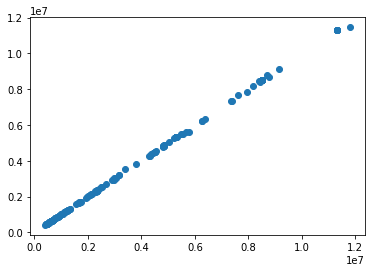

In [ ]:
plt.scatter(y_test, y_predict_tree)
plt.show()